ДЗ к Семинару 8
На сайте запущен А/В тест с целью увеличить доход. В приложенном excel файле вы найдете сырые данные по результатам эксперимента – user_id, тип выборки variant_name и доход принесенный пользователем revenue.
Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('AB_Test_Results-_2_.csv')

In [3]:
df.head(3)

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [5]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


промежуточный вывод: 
В анализируемых данных нет явных выбросов, данные корректны можно приступать 

In [6]:
A = df.VARIANT_NAME[df.VARIANT_NAME == "control"].describe()
B = df.VARIANT_NAME[df.VARIANT_NAME == "variant"].describe()

print(A)
print(B)

count        4984
unique          1
top       control
freq         4984
Name: VARIANT_NAME, dtype: object
count        5016
unique          1
top       variant
freq         5016
Name: VARIANT_NAME, dtype: object


In [7]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import kstest

In [8]:
print(kstest(df['REVENUE'][df.VARIANT_NAME == "control"], 'norm'))
print(kstest(df['REVENUE'][df.VARIANT_NAME == "variant"], 'norm'))

KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)


In [9]:
mannwhitneyu(df[df.VARIANT_NAME == "control"].REVENUE,
             df[df.VARIANT_NAME == "variant"].REVENUE)

MannwhitneyuResult(statistic=12521564.0, pvalue=0.47825247965294926)

In [10]:
ttest_ind(df[df.VARIANT_NAME == "control"].REVENUE,
          df[df.VARIANT_NAME == "variant"].REVENUE)

Ttest_indResult(statistic=1.2711634519010084, pvalue=0.20370007853373565)

In [12]:
v = df.\
    groupby('USER_ID', as_index=False).\
    agg({'VARIANT_NAME': pd.Series.nunique})

v.head(10)

,USER_ID,VARIANT_NAME
0,2,1
1,3,2
2,4,1
3,5,1
4,6,1
5,9,1
6,10,2
7,11,1
8,12,1
9,13,1


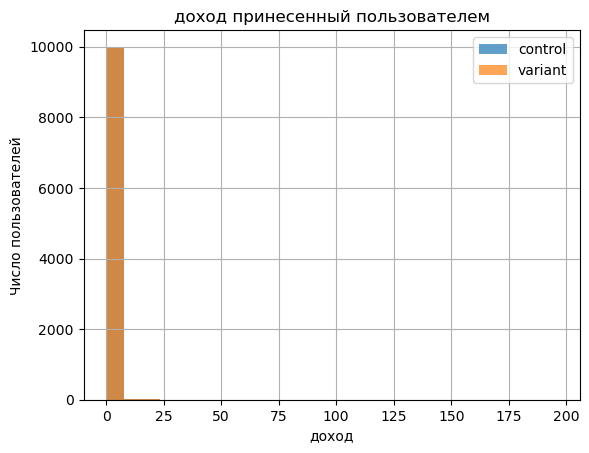

In [28]:
df.REVENUE.hist(bins = 25, alpha =0.7, label='control')
df.REVENUE.hist(bins = 25, alpha =0.7, label='variant')
plt.title('доход принесенный пользователем')
plt.xlabel('доход')
plt.ylabel('Число пользователей')
plt.legend();

Итоговый вывод:
в данных нет выбросов
есть пользователи попавшие в обе группы 
на основе даных можно увидить что показатели прибыли в control группе выше чем в variant примерно в половину
желательно провести повторные тесты и расчёты, т.к. присутствуют случаи когда у одного пользователя в control группе платежей нет, а в variant есть, хотя в большинстве случаев обратынй результат что подтверждают общие расчеты между control и variant